<a href="https://colab.research.google.com/github/TusharKhandelwal95/Image-Classification-using-CNN/blob/main/image_classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Classification using CNN**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
y_train_new = np.squeeze(y_train,axis=1)
y_test_new = np.squeeze(y_test,axis=1)
print(y_train_new.shape)
print(y_train_new)
print(y_test_new.shape)

(50000,)
[6 9 9 ... 9 1 1]
(10000,)


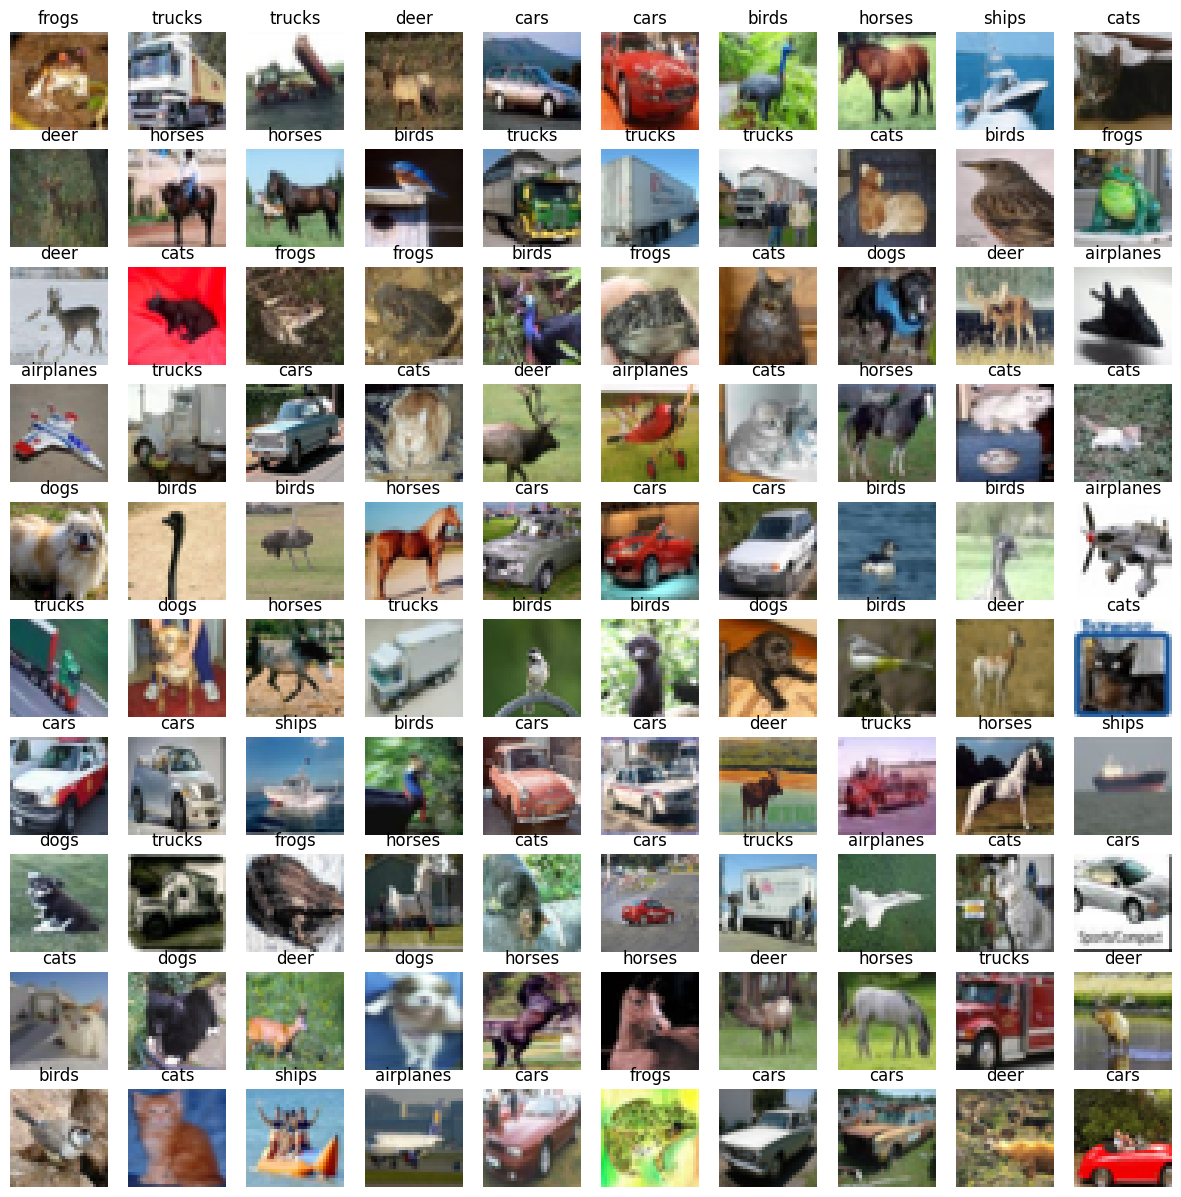

In [ ]:
class_labels = ['airplanes' , 'cars' , 'birds' , 'cats' , 'deer' , 'dogs' , 'frogs' , 'horses' , 'ships' , 'trucks']
plt.figure(figsize = (15,15))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(class_labels[y_train_new[i]])

In [ ]:
#Preprocessing
x_train = x_train/255
x_test = x_test/255

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 15, 15, 64)        256       
 chNormalization)                                                
                                                                 
 flatten_1 (Flatten)         (None, 14400)            

In [ ]:
model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
hist = model.fit(x_train,y_train_new,batch_size=32,epochs=5,verbose=1,validation_split=.3)

Epoch 1/5
1094/1094 [==============================] - 330s 301ms/step - loss: 1.3760 - accuracy: 0.5207 - val_loss: 1.1624 - val_accuracy: 0.5961
Epoch 2/5
1094/1094 [==============================] - 321s 293ms/step - loss: 0.9628 - accuracy: 0.6669 - val_loss: 1.2035 - val_accuracy: 0.6019
Epoch 3/5
1094/1094 [==============================] - 311s 284ms/step - loss: 0.7437 - accuracy: 0.7505 - val_loss: 2.1731 - val_accuracy: 0.6422
Epoch 4/5
1094/1094 [==============================] - 341s 312ms/step - loss: 0.5797 - accuracy: 0.8080 - val_loss: 1.4362 - val_accuracy: 0.6621
Epoch 5/5
1094/1094 [==============================] - 352s 321ms/step - loss: 0.4601 - accuracy: 0.8505 - val_loss: 1.5941 - val_accuracy: 0.6559


In [ ]:
# using the save( method, the model will be saved to the file system in the "SaveModel" format.)
model.save("model_saved")

In [ ]:
reloaded_model = tf.keras.models.load_model('model_saved')

In [ ]:
dict = hist.history
dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

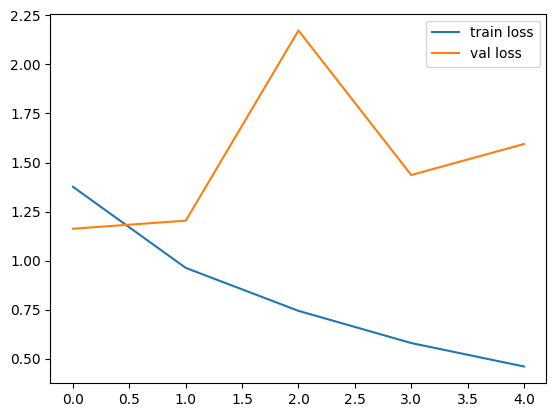

In [ ]:
plt.plot(dict['loss'],label='train loss')
plt.plot(dict['val_loss'],label='val loss')
plt.legend()

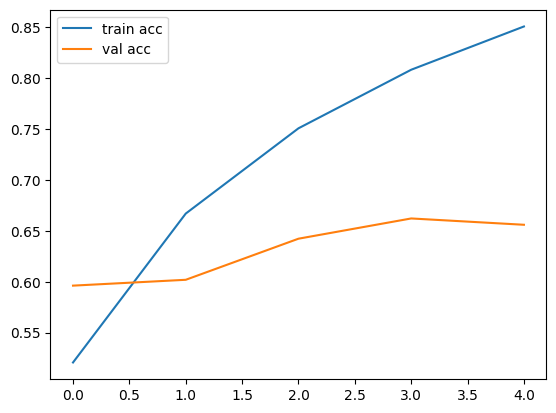

In [ ]:
plt.plot(dict['accuracy'],label='train acc')
plt.plot(dict['val_accuracy'],label='val acc')
plt.legend()

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 16s 50ms/step


In [ ]:
print(y_test_new[0])
print(y_pred[0])
print(np.argmax(y_pred[0]))

3
[7.96667194e-08 1.51018670e-10 6.23427040e-05 9.93288934e-01
 1.12783063e-07 4.68152761e-03 1.56848924e-03 1.85164950e-07
 2.88070209e-04 1.10255125e-04]
3


In [ ]:
y_label=np.argmax(y_pred,axis=1)
print(y_label)

[3 8 8 ... 5 4 7]


In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test_new)
print(test_acc)

313/313 [==============================] - 15s 48ms/step - loss: 1.6229 - accuracy: 0.6453
0.6452999711036682


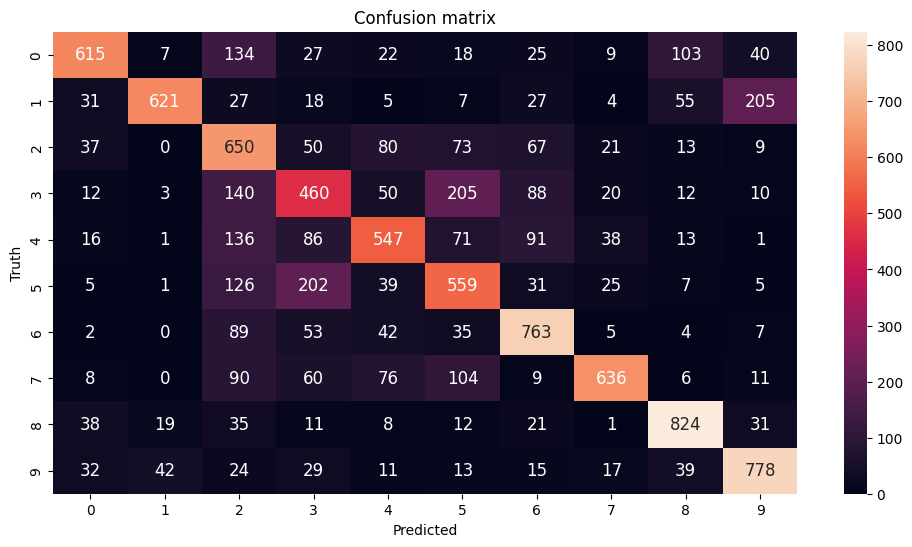

In [ ]:
#Generate a confusion matrix for the dataset
cm = tf.math.confusion_matrix(labels=y_test_new,predictions=y_label)
#Plot the confusion matrix as heatmap
plt.figure(figsize=[12,6])
import seaborn as sn
sn.heatmap(cm,annot=True,fmt="d",annot_kws={"size":12})
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

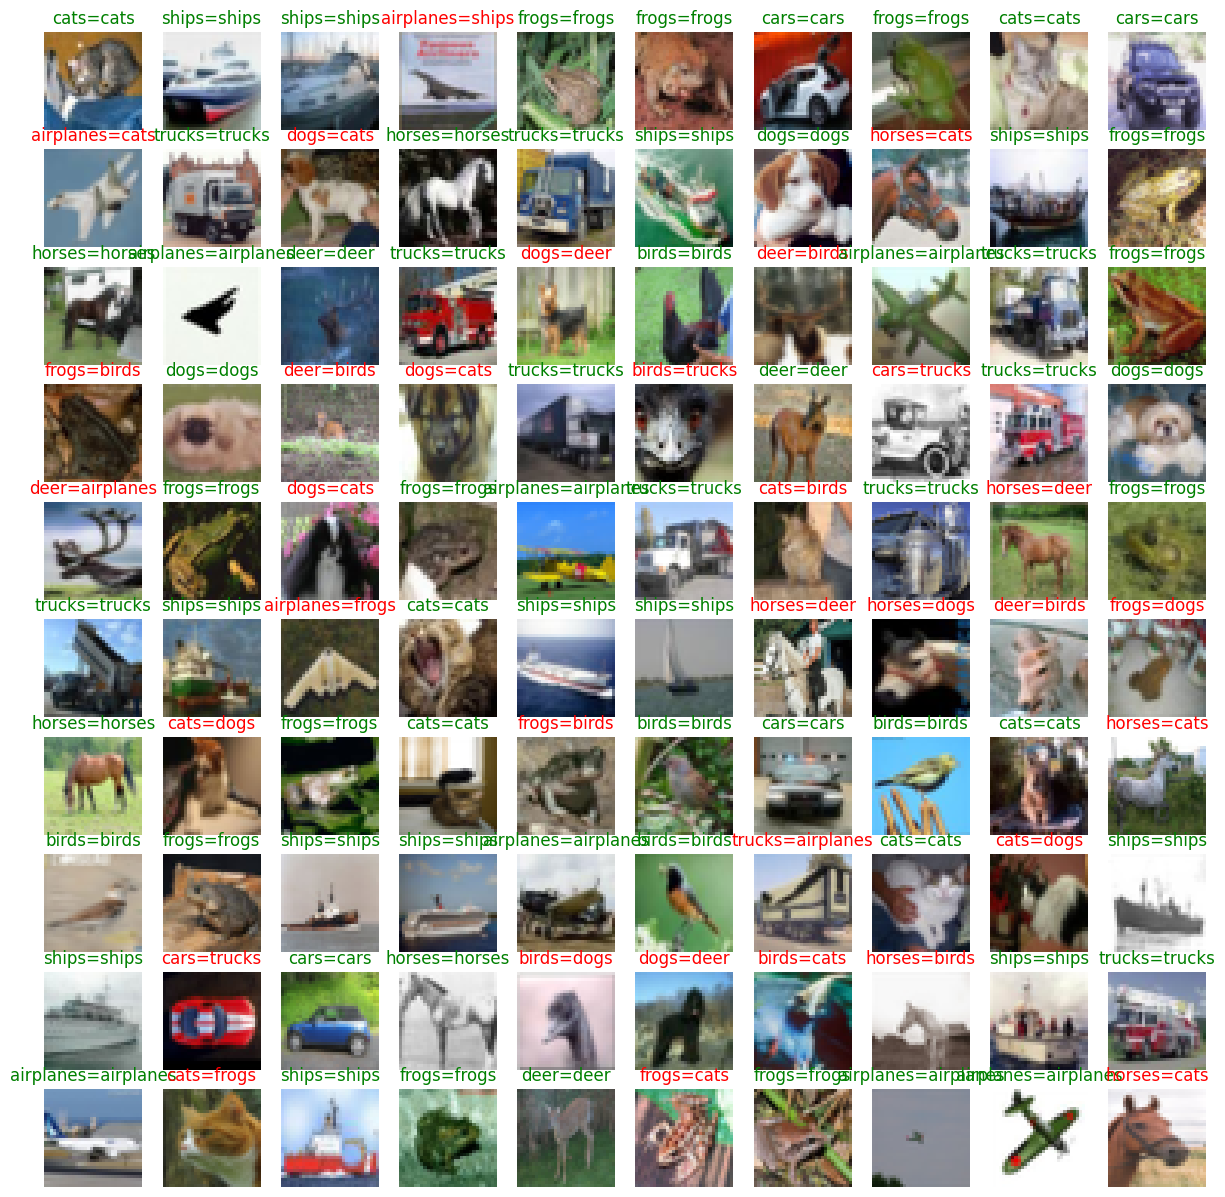

In [ ]:
plt.figure(figsize=(15,15))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(x_test[i])
  plt.axis('off')
  if y_test_new[i] == y_label[i]:
    plt.title(class_labels[y_test_new[i]]+'='+class_labels[y_label[i]],c='g')
  else:
    plt.title(class_labels[y_test_new[i]]+'='+class_labels[y_label[i]],c='r')